# Tugas 02
    Nama : Muhammad Haerul
    NIM  : H071201033
    Kelas: PCD A

## Topic: Edge Detection

In [8]:
import sys
import math
import cv2 as cv
import numpy as np
from skimage import feature
from matplotlib import pyplot as plt
from scipy import ndimage as ndimage
%matplotlib inline

### 1. Diberikan citra rice, Lakukan deteksi tepi pada citra tersebut dan jelaskan perbedaan hasilnya menggunakan operator Laplace dan operator Laplace of Gaussian (LoG) berikut:

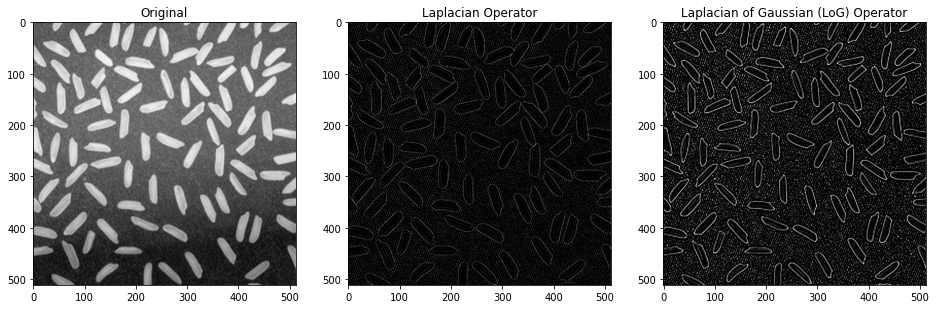

In [9]:
#1. img = rice.png

#read the img
rice = cv.imread('rice.png')
rice = cv.cvtColor(rice, cv.COLOR_RGB2GRAY)

#Laplacian operator
laplacian = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]])
riceLaplacian = cv.filter2D(rice, -1, laplacian)

#Laplacian of Gaussian (LoG) operator
LoG = np.array([[0, 0, -1, 0, 0],
                [0, -1, -2, -1, 0],
                [-1, -2, 16, -2, -1],
                [0, -1, -2, -1, 0],
                [0, 0, -1, 0, 0]])
riceLoG = cv.filter2D(rice, -1, LoG)

#show the imgs
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
ax[0].imshow(rice, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(riceLaplacian, cmap='gray')
ax[1].set_title('Laplacian Operator')
ax[2].imshow(riceLoG, cmap='gray')
ax[2].set_title('Laplacian of Gaussian (LoG) Operator')
plt.show()

Teori:
- Operator laplace adalah operator yang diperoleh dari penuruan persamaan turunan orde kedua. Operator ini mendeteksi tepi lebih akurat pada tepi yang curam. Pada tepi yang curam, turunan keduanya mempunya persilangan nol (zero-crossing), di mana terdapat pergantian tanda nilai turunan orde kedua dari positif ke negatif atau sebaliknya. Operator ini tidak bekerja dengan maksimal pada gambar yang memiliki noise karena akan menghasilkan tepi-tepi palsu.

Penjelasan:
- Gambar hasil yang diperoleh dari menggunakan operator Laplace memiliki  perbedaan intensitas pixel yang tidak signifikan antara object dengan background. Sehingga tepi yang dihasilkan tidak terlalu jelas. Hal ini disebabkan karena gambar yang diinput memiliki noise.
- Sedangkan, pada gambar hasil dari operator Laplace of Gaussian memiliki perbedaan intensitas pixel yang signifikan antara object dan background, sehingga tepi yang dihasilkan lebih jelas. Hal ini disebabkan karena operator ini melakukan penghalusan gambar input terlebih dahulu untuk mengurangi noise dengan Gaussian, kemudian dilanjutkan dengan pendeteksian tepi dengan Laplace.


### 2. Lakukan filter Sobel, Prewitt, Roberts untuk deteksi tepi pada citra berikut boat, lena, bird, dan peppers. Tentukan dan jelaskan metode terbaik untuk masing-masing citra. 

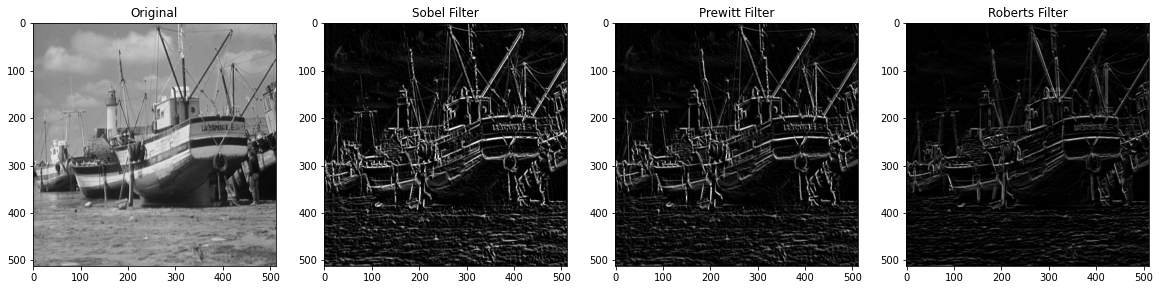

In [10]:
#2. img = boat.tiff

#read the img
img = cv.imread('boat.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_blur = cv.GaussianBlur(img_gray, (3,3), 0)

#Sobel filter (x and y)
sobelX = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobelY = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
img_sobelX = cv.filter2D(img_blur, -1, sobelX)
img_sobelY = cv.filter2D(img_blur, -1, sobelY)
img_sobelXY = img_sobelX + img_sobelY

#Prewitt filter (x and y)
prewittX = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewittY = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
img_prewittX = cv.filter2D(img_blur, -1, prewittX)
img_prewittY = cv.filter2D(img_blur, -1, prewittY)
img_prewittXY = img_prewittX + img_prewittY

#Roberts filter (x and y)
robertsX = np.array([[1, 0 ], [0,-1 ]])
robertsY = np.array([[ 0, 1 ], [ -1, 0 ]])
img_robertsX = cv.filter2D(img_blur, -1, robertsX)
img_robertsY = cv.filter2D(img_blur, -1, robertsY)
img_robertsXY = img_robertsX + img_robertsY

#show the imgs
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img_sobelXY, cmap='gray')
ax[1].set_title('Sobel Filter')
ax[2].imshow(img_prewittXY, cmap='gray')
ax[2].set_title('Prewitt Filter')
ax[3].imshow(img_robertsXY, cmap='gray')
ax[3].set_title('Roberts Filter')
plt.show()

### Metode terbaik: Prewitt Filter

#### Penjelasan:
- Citra boat.tiff merupakan gambar yang terdiri dari beberapa objek berupa kapal-kapal yang saling berdekatan satu sama lain. Pada hasil diatas, metode yang menghasilkan deteksi tepi terbaik adalah filter Prewitt. Dapat dilihat pada gambar output "Prewit Filter" tepi-tepi terdeteksi dengan baik, sehingga batas antara kapal yang satu dengan yang lain terlihat jelas.


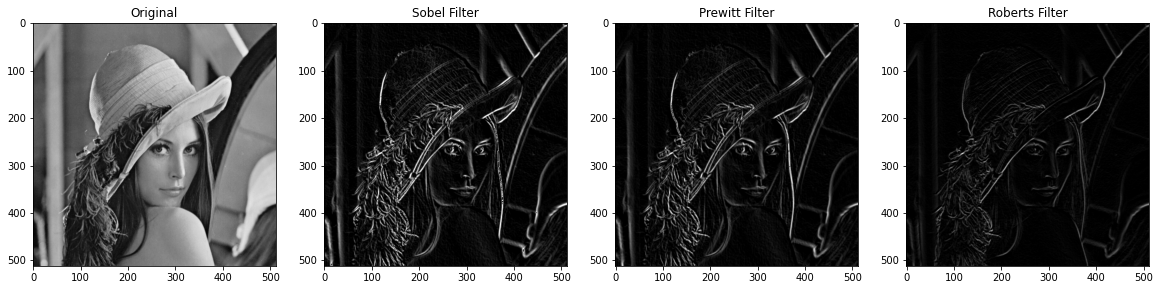

In [11]:
#2. img = lena.bmp

#read the img
img = cv.imread('lena.bmp')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_blur = cv.GaussianBlur(img_gray, (3,3), 0)

#Sobel filter (x and y)
sobelX = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobelY = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
img_sobelX = cv.filter2D(img_blur, -1, sobelX)
img_sobelY = cv.filter2D(img_blur, -1, sobelY)
img_sobelXY = img_sobelX + img_sobelY

#Prewitt filter (x and y)
prewittX = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewittY = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittX = cv.filter2D(img_blur, -1, prewittX)
img_prewittY = cv.filter2D(img_blur, -1, prewittY)
img_prewittXY = img_prewittX + img_prewittY

#Roberts filter (x and y)
robertsX = np.array([[1, 0 ], [0,-1 ]])
robertsY = np.array([[ 0, 1 ], [ -1, 0 ]])
img_robertsX = cv.filter2D(img_blur, -1, robertsX)
img_robertsY = cv.filter2D(img_blur, -1, robertsY)
img_robertsXY = img_robertsX + img_robertsY

#show the imgs
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img_sobelXY, cmap='gray')
ax[1].set_title('Sobel Filter')
ax[2].imshow(img_prewittXY, cmap='gray')
ax[2].set_title('Prewitt Filter')
ax[3].imshow(img_robertsXY, cmap='gray')
ax[3].set_title('Roberts Filter')
plt.show()

### Metode terbaik: Sobel Filter 

#### Penjelasan:
- Citra lena.bmp merupakan gambar yang terdiri dari satu objek tunggal berupa bentuk sesorang dari atas kepala sampai bahu. Pada hasil di atas, metode yang menghasilkan deteksi tepi terbaik adalah filter Sobel. Dapat dilihat pada gambar output "Sobel Filter" tepi dari objek terlihat sangat jelas dan detail.   

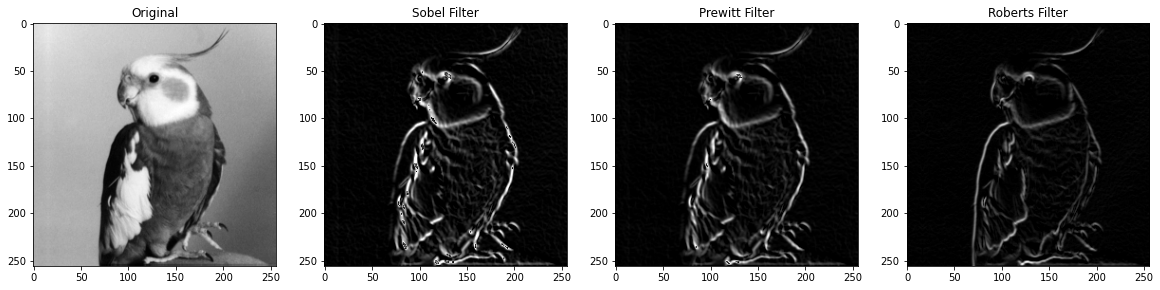

In [12]:
#2. img = bird.bmp

#read the img
img = cv.imread('bird.bmp')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_blur = cv.GaussianBlur(img_gray, (3,3), 0)

#Sobel filter (x and y)
sobelX = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobelY = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
img_sobelX = cv.filter2D(img_blur, -1, sobelX)
img_sobelY = cv.filter2D(img_blur, -1, sobelY)
img_sobelXY = img_sobelX + img_sobelY

#Prewitt filter (x and y)
prewittX = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewittY = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittX = cv.filter2D(img_blur, -1, prewittX)
img_prewittY = cv.filter2D(img_blur, -1, prewittY)
img_prewittXY = img_prewittX + img_prewittY

#Roberts filter (x and y)
robertsX = np.array([[1, 0 ], [0,-1 ]])
robertsY = np.array([[ 0, 1 ], [ -1, 0 ]])
img_robertsX = cv.filter2D(img_blur, -1, robertsX)
img_robertsY = cv.filter2D(img_blur, -1, robertsY)
img_robertsXY = img_robertsX + img_robertsY

#show the imgs
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img_sobelXY, cmap='gray')
ax[1].set_title('Sobel Filter')
ax[2].imshow(img_prewittXY, cmap='gray')
ax[2].set_title('Prewitt Filter')
ax[3].imshow(img_robertsXY, cmap='gray')
ax[3].set_title('Roberts Filter')
plt.show()

### Metode terbaik: Roberts Filter 

#### Penjelasan:
- Citra bird.bmp merupakan gambar yang terdiri dari satu objek tunggal berupa seekor burung. Pada hasil di atas, metode yang menghasilkan deteksi tepi terbaik adalah filter Roberts. Dapat dilihat pada gambar output "Robert Filter", tepi dari objek telihat jelas, sehingga batas-batas dari bagian tubuh burung tersebut terlihat jelas. 

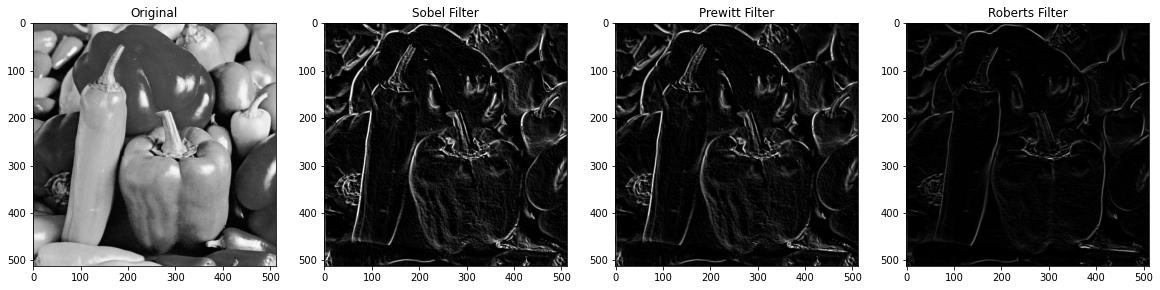

In [13]:
#2. img = peppers.tiff

#read the img
img = cv.imread('peppers.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_blur = cv.GaussianBlur(img_gray, (3,3), 0)

#Sobel filter (x and y)
sobelX = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobelY = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
img_sobelX = cv.filter2D(img_blur, -1, sobelX)
img_sobelY = cv.filter2D(img_blur, -1, sobelY)
img_sobelXY = img_sobelX + img_sobelY

#Prewitt filter (x and y)
prewittX = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewittY = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittX = cv.filter2D(img_blur, -1, prewittX)
img_prewittY = cv.filter2D(img_blur, -1, prewittY)
img_prewittXY = img_prewittX + img_prewittY

#Roberts filter (x and y)
robertsX = np.array([[1, 0 ], [0,-1 ]])
robertsY = np.array([[ 0, 1 ], [ -1, 0 ]])
img_robertsX = cv.filter2D(img_blur, -1, robertsX)
img_robertsY = cv.filter2D(img_blur, -1, robertsY)
img_robertsXY = img_robertsX + img_robertsY

#show the imgs
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img_sobelXY, cmap='gray')
ax[1].set_title('Sobel Filter')
ax[2].imshow(img_prewittXY, cmap='gray')
ax[2].set_title('Prewitt Filter')
ax[3].imshow(img_robertsXY, cmap='gray')
ax[3].set_title('Roberts Filter')
plt.show()

### Metode terbaik: Prewit Filter

#### Penjelasan:
- Citra peppers.tiff merupakan gambar yang terdiri dari beberapa objek berupa kupulan paprika yang bertumpuk. Pada hasil di atas, metode yang menghasilkan deteksi tepi terbaik adalah filter Prewit. Dapat dilihat pada gambar output "Prewit Filter", tepi-tepi terdeteksi dengan baik, sehingga antara batas antara paprika yang satu dengan yang lain terlihat jelas.

### Kesimpulan:

Berdasarkan output yang dihasilkan dari soal nomor 2, dapat disimpulkan bahwa:
- Beberapa hal yang memengaruhi hasil dari pendeteksian tepi suatu citra, yaitu: jumlah objek/jumlah tepi yang akan dideteksi, intensitas warna/keabuan citra, noise pada citra, dan metode berupa filter/operator yang digunakan.
- Pada citra yang terdiri dari satu objek tunggal, filter Sobel cocok untuk digunakan.
- Pada citra yang terdiri dari beberapa/banyak objek yang saling berdekatan atau bertumpukan satu sama lain, filter Prewit cocok untuk digunakan.
- Pada citra yang memiliki intensitas warna/keabuan yang signifikan seperti putih dan hitam, filter Roberts cocok untuk digunakan.


### 3.Lakukan deteksi tepi pada citra lena_noise dengan filter Canny.

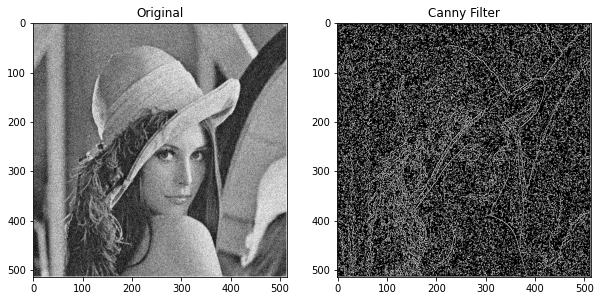

In [14]:
#3. img = lena_noise

#read the img
img = cv.imread('lena_noise.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

#Canny filter
img_canny = cv.Canny(img_gray, 200, 200)    #using cv
#img_canny = feature.canny(img_gray, sigma=2)   #using skimage

#show img
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img_canny, cmap='gray')
ax[1].set_title('Canny Filter')
plt.show()

### 4. Lakukan deteksi tepi pada citra lena_noise dengan terlebih dahulu melakukan median filter dilanjutkan dengan filter Canny.

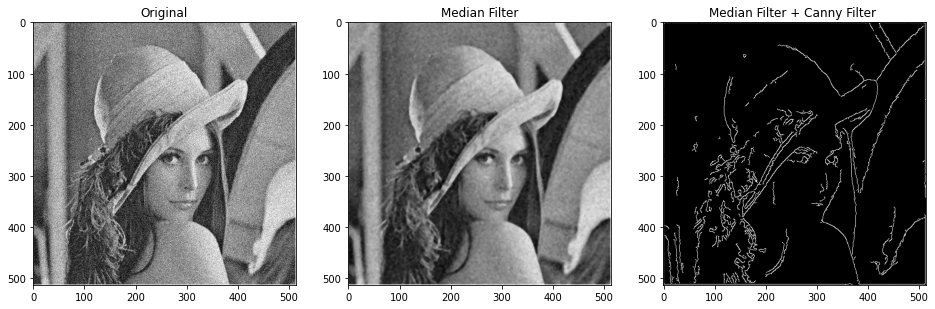

In [15]:
#4. img = lena_noise

#read the img
img = cv.imread('lena_noise.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

#Median filter
img_median = cv.medianBlur(img_gray, 5)

#Canny filter
img_canny = cv.Canny(img_median, 100, 200)    #using cv
#img_canny = feature.canny(img_median, sigma=2)   #using skimage

#show img
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img_median, cmap='gray')
ax[1].set_title('Median Filter')
ax[2].imshow(img_canny, cmap='gray')
ax[2].set_title('Median Filter + Canny Filter ')
plt.show()